# Inhomogeneous Erdos Renyi (IER) Random Network Model

Now that we've learned about the ER, SBM, and RDPG random networks, it's time to figure out why we keep using coin flips! To this end, we will learn about the most general model for an independent edge random network, the Inhomogeneous Erdos Renyi (IER) Random Network.

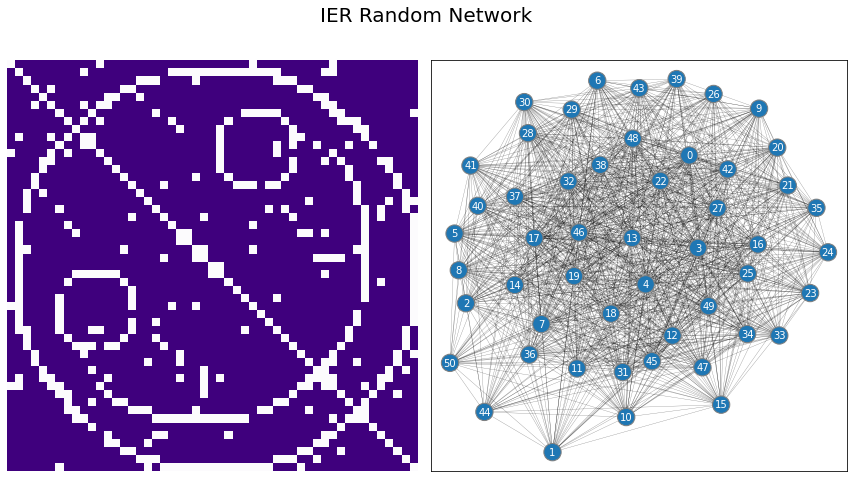

In [107]:
import numpy as np
from graspologic.simulations import sample_edges
from graphbook_code import draw_multiplot

def my_unit_circle(r):
   d = 2*r + 1
   rx, ry = d/2, d/2
   x, y = np.indices((d, d))
   return (np.abs(np.hypot(rx - x, ry - y)-r) < 0.5).astype(int)

def add_smile():
    Ptmp = np.zeros((51, 51))
    Ptmp[2:45, 2:45] = my_unit_circle(21)
    mask = np.zeros((51, 51), dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    upper_left = np.rot90(mask)
    Ptmp[upper_left] = 0
    return Ptmp
    
def smiley_prob(upper_p, lower_p):
    smiley = add_smile()
    P = my_unit_circle(25)
    P[5:16, 25:36] = my_unit_circle(5)
    P[smiley != 0] = smiley[smiley != 0]
    
    mask = np.zeros((51, 51), dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    P[~mask] = 0
    P = (P + P.T - np.diag(np.diag(P))).astype(float)
    P[P == 1] = lower_p
    P[P == 0] = upper_p
    return P

P = smiley_prob(.95, 0.05)
A = sample_edges(P, directed=False, loops=False)

draw_multiplot(A, title="IER Random Network");

## The Inhomogeneous Erdos-Renyi (IER) Random Network Model is parametrized by a matrix of independent-edge probabilities

The IER random network is the most general random network model for a binary graph. The way we can think of the $IER$ random network is that a probability matrix $P$ with $n$ rows and $n$ columns defines each of the edge-existence probabilities for pairs of nodes in the network. For each pair of nodes $i$ and $j$, we have a unique coin which has a $p_{ij}$ chance of landing on heads, and a $1 - p_{ij}$ chance of landing on tails. If the coin lands on heads, the edge between nodes $i$ and $j$ exists, and if the coin lands on tails, the edge between nodes $i$ and $j$ does not exist. This coin flip is performed independently of the coin flips for all of the other edges. If $\mathbf A$ is a random network which is $IER$ with a probability matrix $P$, we say that $\mathbf A$ is an $IER_n(P)$ random network.

### Generating a sample from an $IER_n(P)$ random network

As before, we can develop a procedure to produce for us a network $A$, which has nodes and edges, where the underlying random network $\mathbf A$ is an $IER_n(P)$ random network:

```{admonition} Simulating a sample from an $IER_n(P)$ random network
1. Determine a probability matrix $P$, whose entries $p_{ij}$ are probabilities.
2. For each pair of nodes $i$ an $j$:
    * Obtain a weighted coin $(i,j)$ which has a probability $p_{ij}$ of landing on heads, and a $1 - p_{ij}$ probability of landing on tails.
    * Flip the $(i,j)$ coin, and if it lands on heads, the corresponding entry $a_{ij}$ in the adjacency matrix is $1$. If the coin lands on tails, the corresponding entry $a_{ij}$ is $0$. 
3. The adjacency matrix we produce, $A$, is a sample of an $IER_n(P)$ random network. 
```

Let's put this in practice. Since we know about probability matrices from the section on RDPG, we'll first take a look at the probability matrix for our IER network. This example is very unnecessarily sophisticated, but we have a reason for it:

In [109]:
import numpy as np

def my_unit_circle(r):
   d = 2*r + 1
   rx, ry = d/2, d/2
   x, y = np.indices((d, d))
   return (np.abs(np.hypot(rx - x, ry - y)-r) < 0.5).astype(int)

def add_smile():
    Ptmp = np.zeros((51, 51))
    Ptmp[2:45, 2:45] = my_unit_circle(21)
    mask = np.zeros((51, 51), dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    upper_left = np.rot90(mask)
    Ptmp[upper_left] = 0
    return Ptmp
    
def smiley_prob(upper_p, lower_p):
    smiley = add_smile()
    P = my_unit_circle(25)
    P[5:16, 25:36] = my_unit_circle(5)
    P[smiley != 0] = smiley[smiley != 0]
    
    mask = np.zeros((51, 51), dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    P[~mask] = 0
    P = (P + P.T - np.diag(np.diag(P))).astype(float)
    P[P == 1] = lower_p
    P[P == 0] = upper_p
    return P

P = smiley_prob(.95, 0.05)

Text(86.0, 0.5, 'Node')

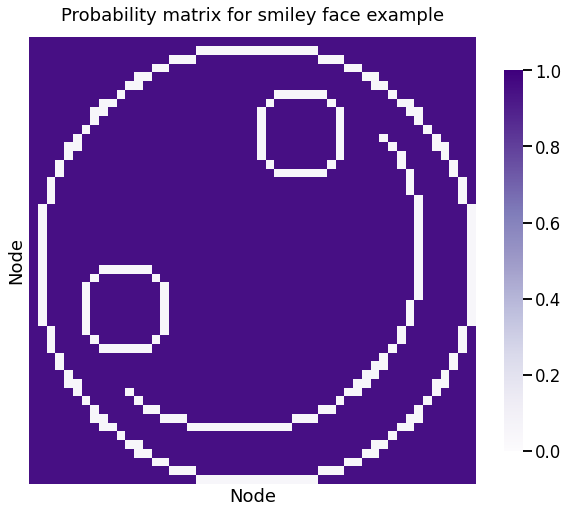

In [118]:
from graphbook_code import heatmap

ax = heatmap(P, vmin=0, vmax=1, title="Probability matrix for smiley face example")
ax.set_xlabel("Node")
ax.set_ylabel("Node");

If the edge is between a pair of nodes that defines the smiley face, the probability is $0.05$, whereas the edge probability for the other edges in the network is $0.95$. A network realization looks like this:

In [119]:
A = sample_edges(P, directed=False, loops=False)

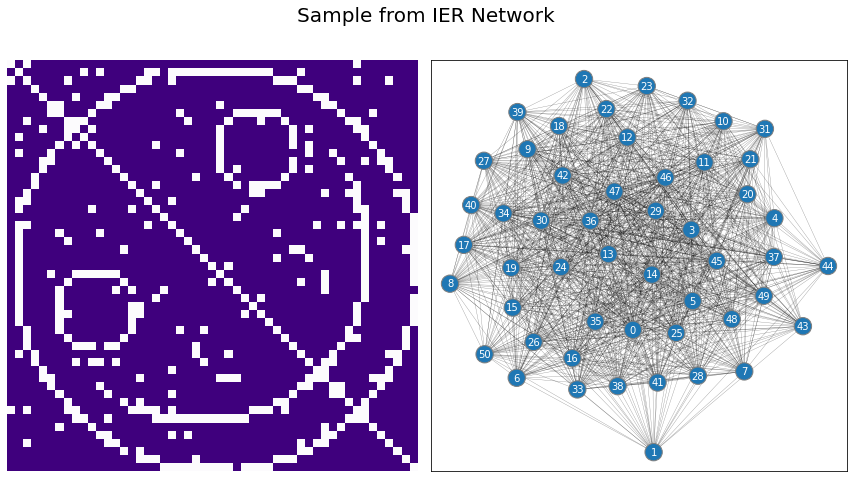

In [122]:
draw_multiplot(A, title="Sample from IER Network");

We used this example to show you the key idea behind the IER Network's probability matrix is simple: the entries can really be anything as long as they are probabilities (between $0$ and $1$), and the resulting matrix is symmetric (in the case of undirected networks). There are no additional requirements for structure to the network.

## The IER model unifies independent-edge random network models

It is important to realize that all of the networks we have described so far are also IER random networks. The previous single network models we have described to date simply place restrictions on the way in which we acquire $P$. For instance, in an $ER_n(p)$ random network, all entries $p_{ij}$ of $P$ can just be set equal to $p$. To see that an $SBM_n(\vec z, B)$ random network is also $IER_n(P)$, we can construct the probability matrix $P$ such that $p_{ij} = b_{kl}$ of the block matrix $B$ when the community of node $i$ is $z_i = k$ and the community of node $j$ is $z_j = l$. To see that an $RDPG_n(X)$ random network is also $IER_n(P)$, we can construct the probability matrix $P$ such that $P = XX^\top$. This shows that the IER random network is the most general of the single network models we have studied so far. 

### Limitations of the IER model when you have one network

This construction is not entirely useful when you have one sample, because for each edge, you only get to see one sample (either the edge exists or doesn't exist). This means that we won't really be able to learn about the individual edge probabilities in practice when we only have a single sample of a network in a way which would differentiate them from other single networks. What we mean by this is, if we learn about other single networks, we are still *technically* learning about an IER random network, because like we saw in the last paragraph, all of these other single network models are just *special cases* of the IER random network. However, we can't learn any random network with one sample that could *only* be described by an IER random network, so it almost feels a *little bit useless* from what we've covered so far. As you will learn shortly, the IER random network is, on the other hand, *extremely* useful when you have multiple networks. When you have multiple networks, with some limited assumptions, you *can* learn about networks that you would otherwise not be able to describe with more simple random networks like ER, SBM, or RDPG random netweorks. This will make the IER random network *extremely powerful* when you have multiple samples of network data.